In [174]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import time
import numpy as np
import matplotlib.pyplot as plt

dev = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(dev)

mps


In [142]:
randint = torch.randint(-100, 100, (6,))
randint

tensor([-100,   25,   96,   36,  -61,   44])

In [143]:
tensor = torch.Tensor([[1.1, 1.2],[2.2, 2.3],[3.3, 3.4]])
tensor

tensor([[1.1000, 1.2000],
        [2.2000, 2.3000],
        [3.3000, 3.4000]])

In [144]:
zeros = torch.zeros(2, 3)
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [145]:
ones = torch.ones(3, 4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [146]:
inp = torch.empty(2,3)
inp

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [147]:
ara = torch.arange(6)
ara

tensor([0, 1, 2, 3, 4, 5])

In [148]:
linspace = torch.linspace(3, 10, steps=5)
linspace

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [149]:
logst = torch.logspace(start=-10, end=10, steps=6)
logst

tensor([1.0000e-10, 1.0000e-06, 1.0000e-02, 1.0000e+02, 1.0000e+06, 1.0000e+10])

In [150]:
eye = torch.eye(6)
eye

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [151]:
%%time
torch_1_rand = torch.rand(100, 100, 100, 100).to('mps')
torch_2_rand = torch.rand(100, 100, 100, 100).to('mps')
np_1_rand = torch.rand(100, 100, 100, 100)
np_2_rand = torch.rand(100, 100, 100, 100)

start_t = time.time()
torch_1_rand @ torch_2_rand
print(f'MPS: {time.time() - start_t:.8f}s')

start_n = time.time()
np.multiply(torch_1_rand.cpu(), torch_2_rand.cpu())
print(f'CPU: {time.time() - start_n:.8f}s')

MPS: 0.00071716s
CPU: 0.12795591s
CPU times: user 855 ms, sys: 147 ms, total: 1 s
Wall time: 1.1 s


In [152]:
probabilities = torch.Tensor([0.1, 0.9])
smaples = torch.multinomial(probabilities, num_samples=10, replacement=True)
smaples

tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [153]:
tens = torch.Tensor([1, 2, 3, 4])
out = torch.cat((tens, torch.Tensor([5, 6])), dim=0)
out

tensor([1., 2., 3., 4., 5., 6.])

In [154]:
out = torch.tril(torch.ones(5, 5)) # Triangle lower
out

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [155]:
out = torch.triu(torch.ones(5, 5)) # Triangle upper
out

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

In [156]:
out = torch.zeros(5, 5).masked_fill(torch.tril(torch.ones(5, 5)) == 0, float('-inf'))
out

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [157]:
out.exp()

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [158]:
inp = torch.zeros(2, 3, 4)
out = inp.transpose(0, 2)
out.shape

torch.Size([4, 3, 2])

In [159]:
ten1 = torch.Tensor([1, 2, 3])
ten2 = torch.Tensor([4, 5, 6])
ten3 = torch.Tensor([7, 8, 9])

s_ten = torch.stack([ten1, ten2, ten3])
s_ten

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [160]:
samp = torch.Tensor([10., 10., 10.])
linear = nn.Linear(3, 3, bias=False)
print(linear(samp))

tensor([ 6.1852,  4.8298, -7.3508], grad_fn=<SqueezeBackward4>)


In [161]:
tensor1 = torch.Tensor([1., 2., 3.])

softmax_out = F.softmax(tensor1, dim=0)
# [ 1.esx() , 2.exp() , 3.exp() ]
# [ 2.71, 7.38, 20.08 ] sum == 30.193
# [ 2.71/30.193, 7.38/30.193, 30.08/30.193]
# [ 0.089, 0.244, 0.996 ]
print(softmax_out)

tensor([0.0900, 0.2447, 0.6652])


In [162]:
np.exp(5)

148.4131591025766

In [163]:
vocab_size = 10000
embedding_dim = 100

embedding = nn.Embedding(vocab_size, embedding_dim)
input_indicies = torch.LongTensor([1, 5, 3, 2])

embedding_out = embedding(input_indicies)
print(embedding_out.shape)

torch.Size([4, 100])


In [164]:
# The @ symbol is the torch notation for the Dot product (matrix multiplication)
a = torch.Tensor([[1, 2], [3, 4], [5, 6]])
b = torch.Tensor([[7, 8, 9],[10, 11, 12]])
print(a @ b) 

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


In [165]:
a = torch.rand(2, 3, 5)
x, y, z = a.shape
a = a.view(x, y, z)
a

tensor([[[0.7580, 0.4076, 0.4459, 0.9455, 0.3965],
         [0.6201, 0.5546, 0.2836, 0.5156, 0.2141],
         [0.5964, 0.0030, 0.7456, 0.2993, 0.7364]],

        [[0.5411, 0.8126, 0.0304, 0.4225, 0.1090],
         [0.5090, 0.2319, 0.1385, 0.2087, 0.3124],
         [0.7452, 0.9702, 0.2182, 0.6479, 0.9364]]])

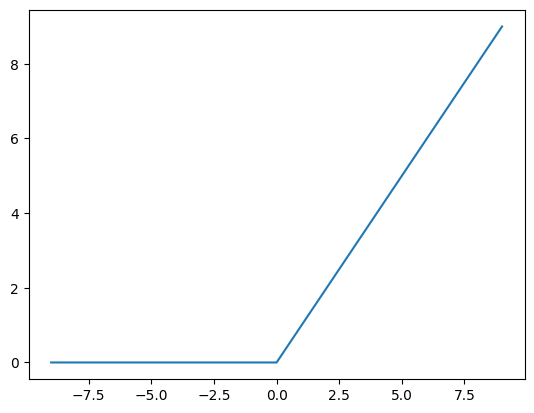

In [177]:
x = torch.Tensor([-9, -5, -2.5, -0, 3, 6, 9])
y = F.relu(x)
plt.plot(
    x.cpu().numpy(), 
    y.cpu().numpy()
)

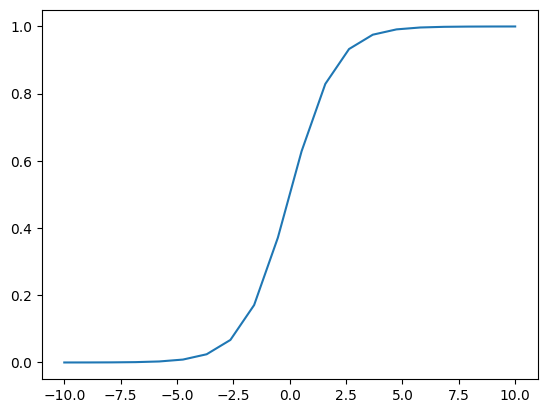

In [183]:
x = torch.Tensor(torch.linspace(-10, 10, steps=20))
y = F.sigmoid(x)
plt.plot(
    x.cpu().numpy(), 
    y.cpu().numpy()
)

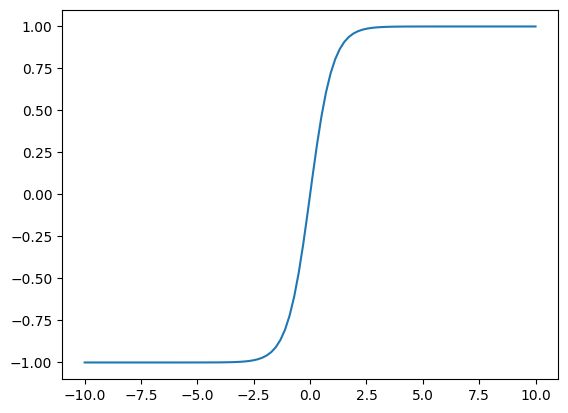

In [193]:
x = torch.Tensor(torch.linspace(-10, 10, steps=100))
y = F.tanh(x)
plt.plot(
    x.cpu().numpy(), 
    y.cpu().numpy()
)

plt.show()

In [194]:
0.005e-3

5e-06